In [31]:

import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
from scipy import stats
import sklearn.preprocessing as skp

from sklearn.model_selection import train_test_split
import pandas as pd
import wrangle as w
import warnings
warnings.filterwarnings('ignore')

### Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [32]:
df = w.wrangle_zillow()

In [33]:
df.head()

,num_bedrooms,num_bathrooms,finished_sqft,tax_value,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA


In [34]:
w.check_columns(df)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,dtype
6,county,3,"[LA, Orange, Ventura]",0,object
0,num_bedrooms,19,"[4, 3, 0, 5, 2, 1, 6, 7, 8, 9, 25, 10, 11, 14,...",0,int64
1,num_bathrooms,38,"[2.0, 4.0, 0.0, 1.0, 2.5, 3.5, 3.0, 5.5, 4.5, ...",0,float64
4,yearbuilt,153,"[2005, 2011, 1926, 1972, 1973, 1960, 1950, 195...",0,int64
2,finished_sqft,10557,"[3633, 1620, 2077, 1200, 171, 203, 1244, 1300,...",0,int64
3,tax_value,588178,"[296425, 847770, 646760, 5328, 6920, 14166, 16...",0,int64
5,taxamount,915868,"[6941.39, 10244.94, 7924.68, 91.6, 255.17, 163...",0,float64


In [35]:
# split data 
train, validate, test = w.split_data(df)

Train: 0.5599997196569536
Validate: 0.24000028034304643
Test: 0.2


### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .


### Unscaled

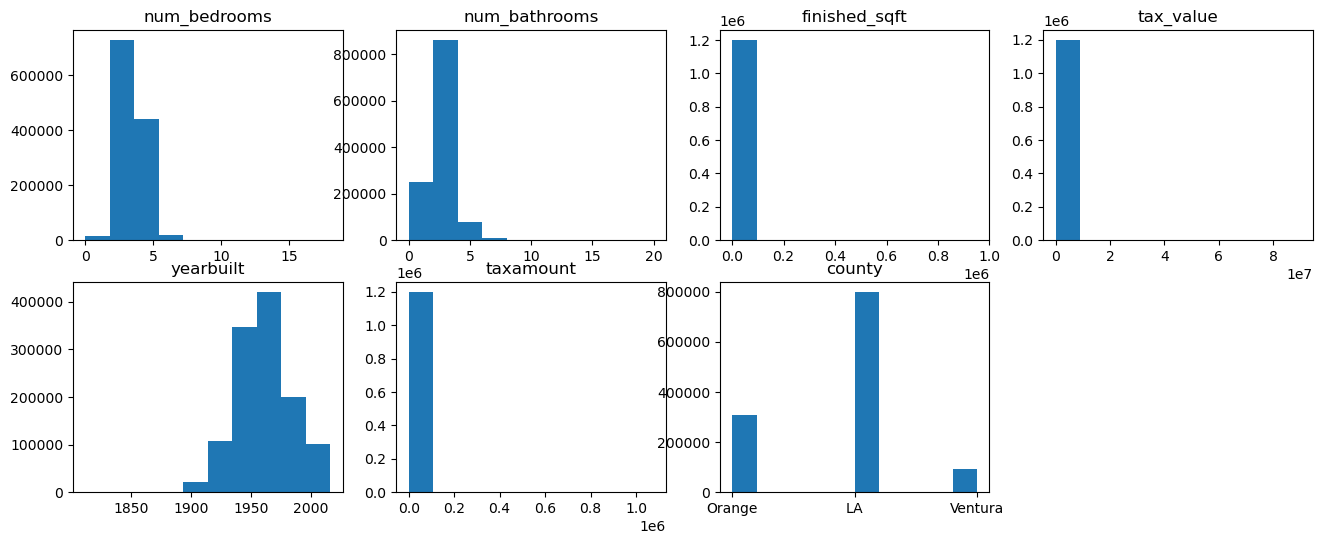

In [36]:

plt.figure(figsize=(16,6))
for i, col in enumerate(train.columns):
    plot_num = i+1
    plt.subplot(2,4, plot_num)
    plt.title(col)
    plt.hist(train[col])

### MinMax

In [37]:
x_train, x_validate, x_test = train[['num_bedrooms']],validate[['num_bedrooms']],test[['num_bedrooms']]
y_train, y_validate, y_test = train.county, validate.county, test.county

Text(0.5, 1.0, 'Scaled')

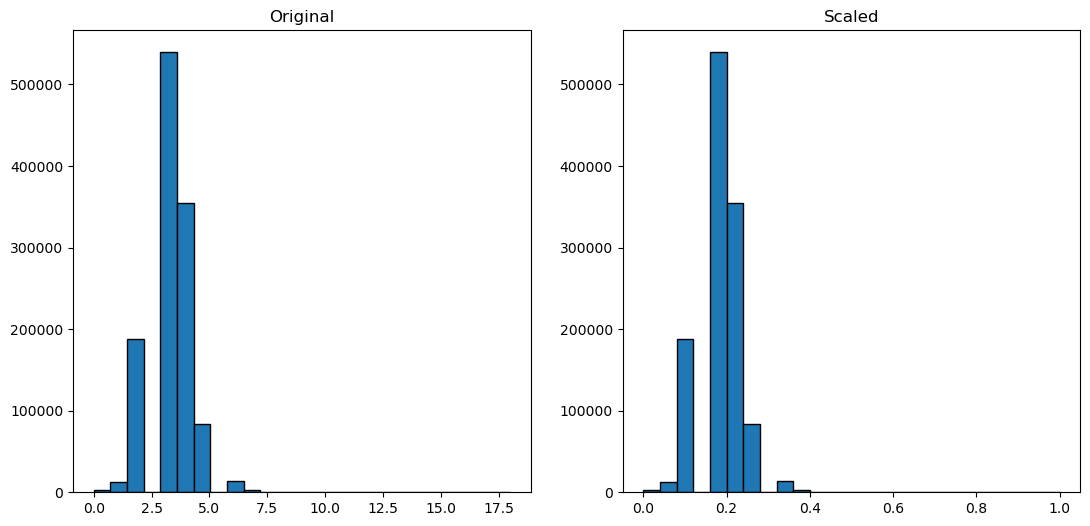

In [38]:
scaler = skp.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')


### Standard Scaler

Text(0.5, 1.0, 'Scaled')

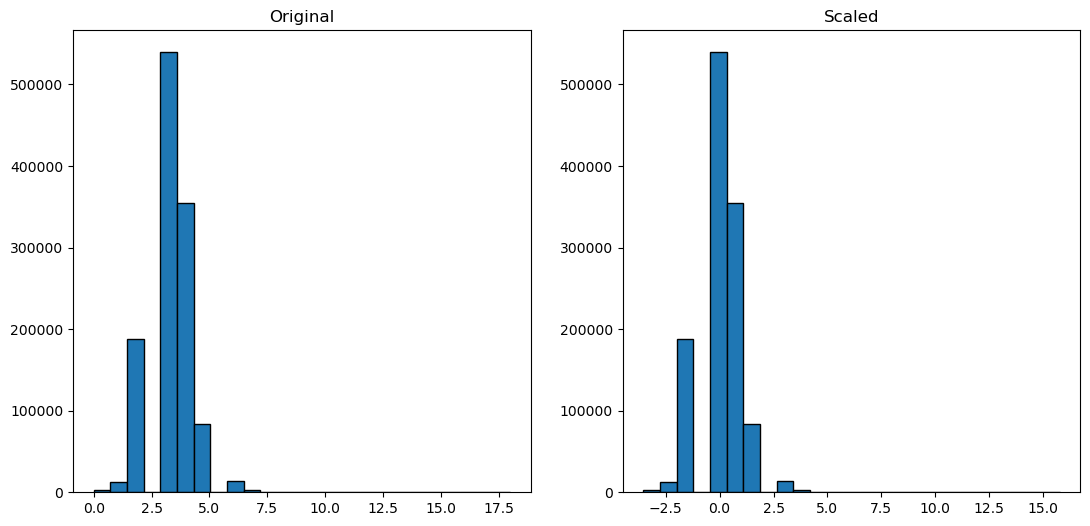

In [39]:
scaler = skp.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

### Robust

Text(0.5, 1.0, 'Scaled')

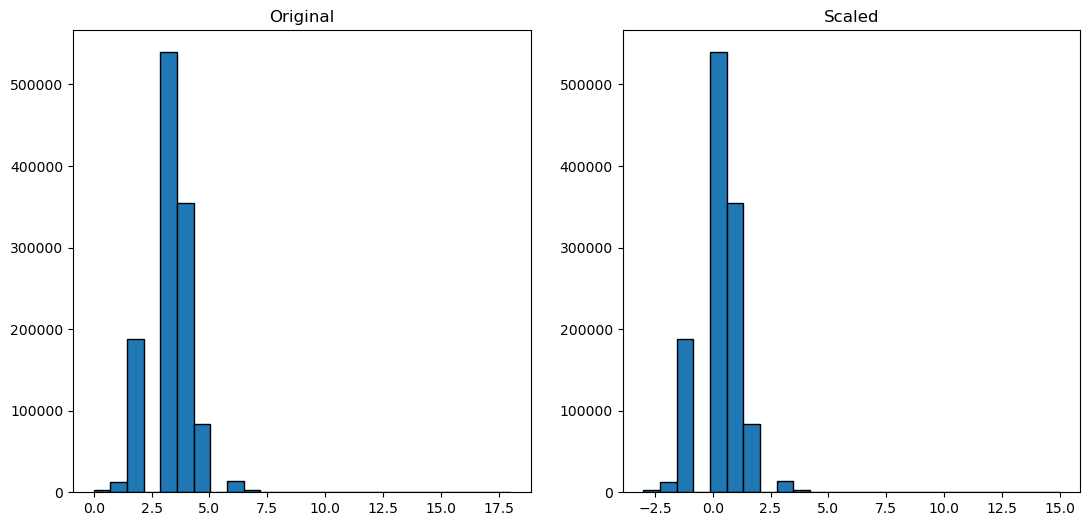

In [40]:
scaler = skp.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


Text(0.5, 1.0, 'Scaled')

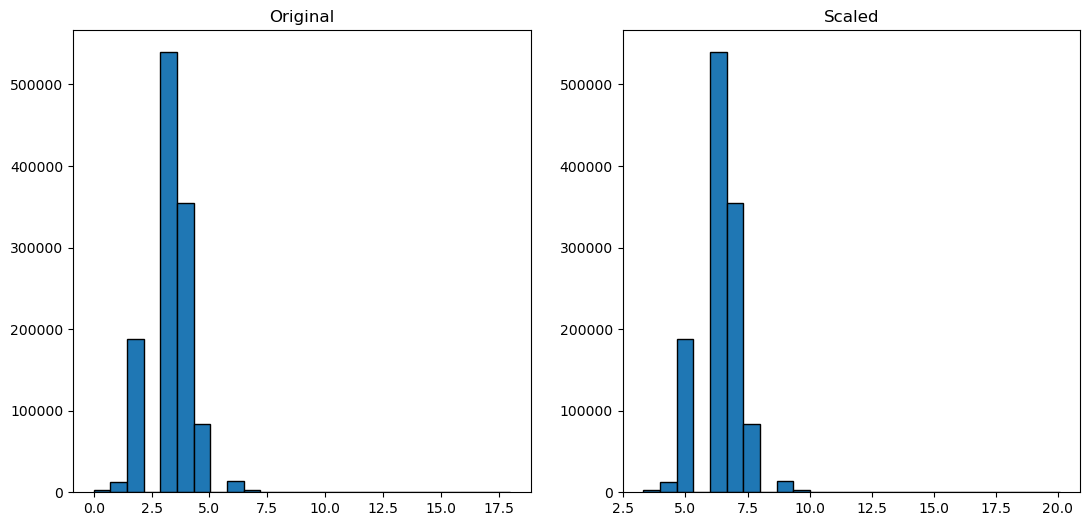

In [41]:
scaler = skp.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.inverse_transform(x_train)
x_validate_scaled = scaler.inverse_transform(x_validate)
x_test_scaled = scaler.inverse_transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

In [42]:
print(x_train_scaled[:5])
print(x_train.head())


[[7.02990095]
 [6.09767241]
 [7.02990095]
 [6.09767241]
 [6.09767241]]
         num_bedrooms
1937068             4
1201703             3
751562              4
235077              3
1991181             3


### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


Text(0.5, 1.0, 'Scaled')

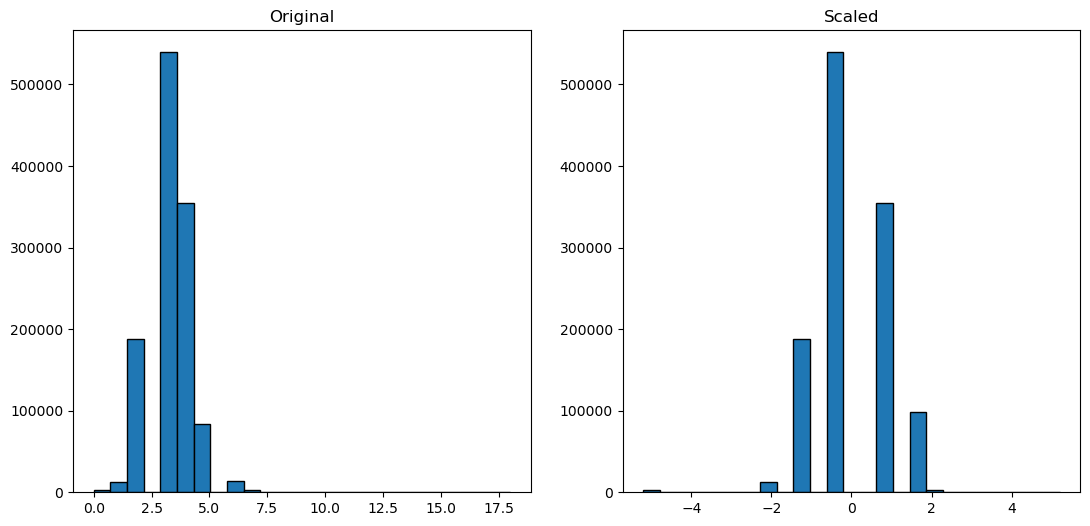

In [43]:
scaler = skp.QuantileTransformer(n_quantiles=20, output_distribution='normal' )
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


Text(0.5, 1.0, 'Scaled')

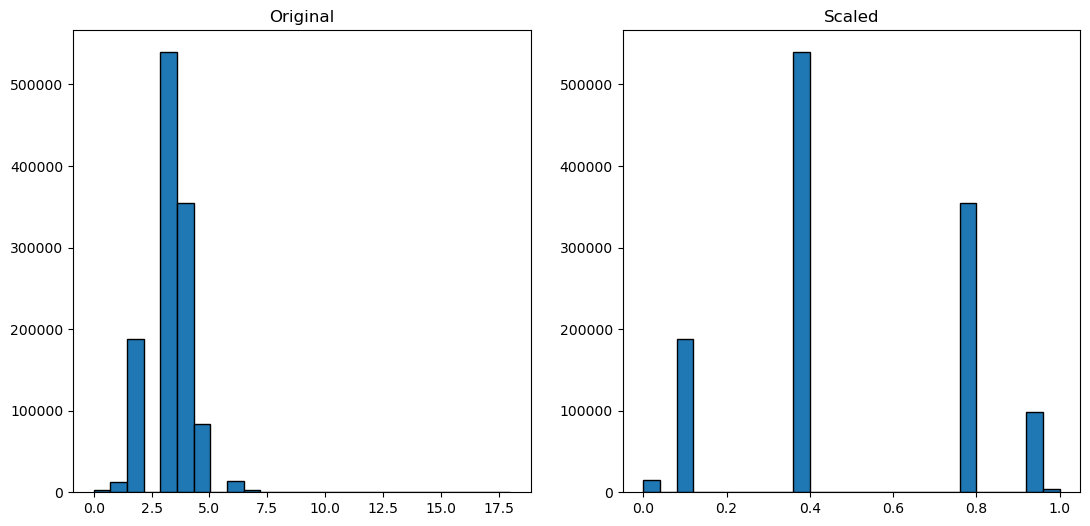

In [44]:
scaler = skp.QuantileTransformer(n_quantiles=20 )
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [55]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['num_bedrooms', 'num_bathrooms', 'taxamount', 'finished_sqft'],
               return_scaler=False
               ):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = skp.QuantileTransformer()
    #     fit the thing
    scaler.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [57]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)